In [1]:
!pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

In [114]:
df = pd.read_csv('/content/drive/MyDrive/marketing/superstore_data.csv').drop(columns = ['Id'])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']).dt.year
print("Conversion Rate", df['Response'].sum()/len(df)*100, "%")
df

Conversion Rate 14.910714285714285 %


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,2013,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,1977,2n Cycle,Married,31056.0,1,0,2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,1976,Graduation,Divorced,46310.0,1,0,2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,1978,Graduation,Married,65819.0,0,0,2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0


In [138]:
df.isnull().sum()
mean_income_by_education = df.groupby('Education')['Income'].mean()

# Fill missing values in 'Income' with the mean income of the corresponding education level
df['Income'] = df.apply(
    lambda row: mean_income_by_education[row['Education']] if pd.isnull(row['Income']) else row['Income'],
    axis=1
)
df.isnull().sum().max()

0

**If we give promotion to customers who use 80% discount to buy every single day, we will lose money! For an annual fee 500, if a customer spend 2500 every year, we lose 2500 * 0.2 = 500, therefore 2500 is our break even price.**

2525

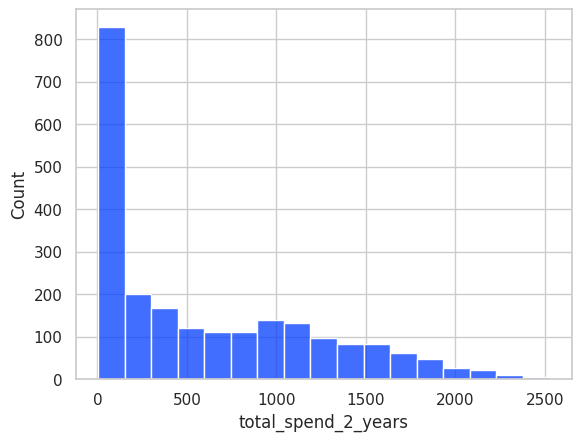

In [116]:
df['total_spend_2_years'] = df['MntFishProducts'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntFruits']
sns.histplot(df['total_spend_2_years'])
df['total_spend_2_years'].max()

**Okay, nobody spends more than 2500, the Superstore is smart...**

In [117]:
df['total_visits'] = df['NumDealsPurchases']+	df['NumWebPurchases']+	df['NumCatalogPurchases']+	df['NumStorePurchases']+	df['NumWebVisitsMonth']
df['average_order_items'] = df['total_spend_2_years']/(df['total_visits']+1)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,total_spend_2_years,total_visits,average_order_items
0,1970,Graduation,Divorced,84835.0,0,0,2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0,1190,16,70.000000
1,1961,Graduation,Single,57091.0,0,0,2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0,577,23,24.041667
2,1958,Graduation,Married,67267.0,0,1,2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,251,13,17.928571
3,1967,Graduation,Together,32474.0,1,1,2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,11,11,0.916667
4,1989,Graduation,Single,21474.0,1,0,2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,91,15,5.687500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,2013,99,372,18,126,47,48,78,2,5,2,11,4,0,0,689,24,27.560000
2236,1977,2n Cycle,Married,31056.0,1,0,2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0,55,13,3.928571
2237,1976,Graduation,Divorced,46310.0,1,0,2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0,309,22,13.434783
2238,1978,Graduation,Married,65819.0,0,0,2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0,1383,23,57.625000


In [118]:
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = df.select_dtypes(include=['number']).columns.tolist()
cat_features, num_features, len(num_features)

(['Education', 'Marital_Status'],
 ['Year_Birth',
  'Income',
  'Kidhome',
  'Teenhome',
  'Dt_Customer',
  'Recency',
  'MntWines',
  'MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds',
  'NumDealsPurchases',
  'NumWebPurchases',
  'NumCatalogPurchases',
  'NumStorePurchases',
  'NumWebVisitsMonth',
  'Response',
  'Complain',
  'total_spend_2_years',
  'total_visits',
  'average_order_items'],
 22)

## **Univariate Analysis**

In [119]:
df['Income'] = df['Income'].clip(0,200000)
df['average_order_items'] = df['average_order_items'].clip(0,150)

<Axes: xlabel='Education', ylabel='Count'>

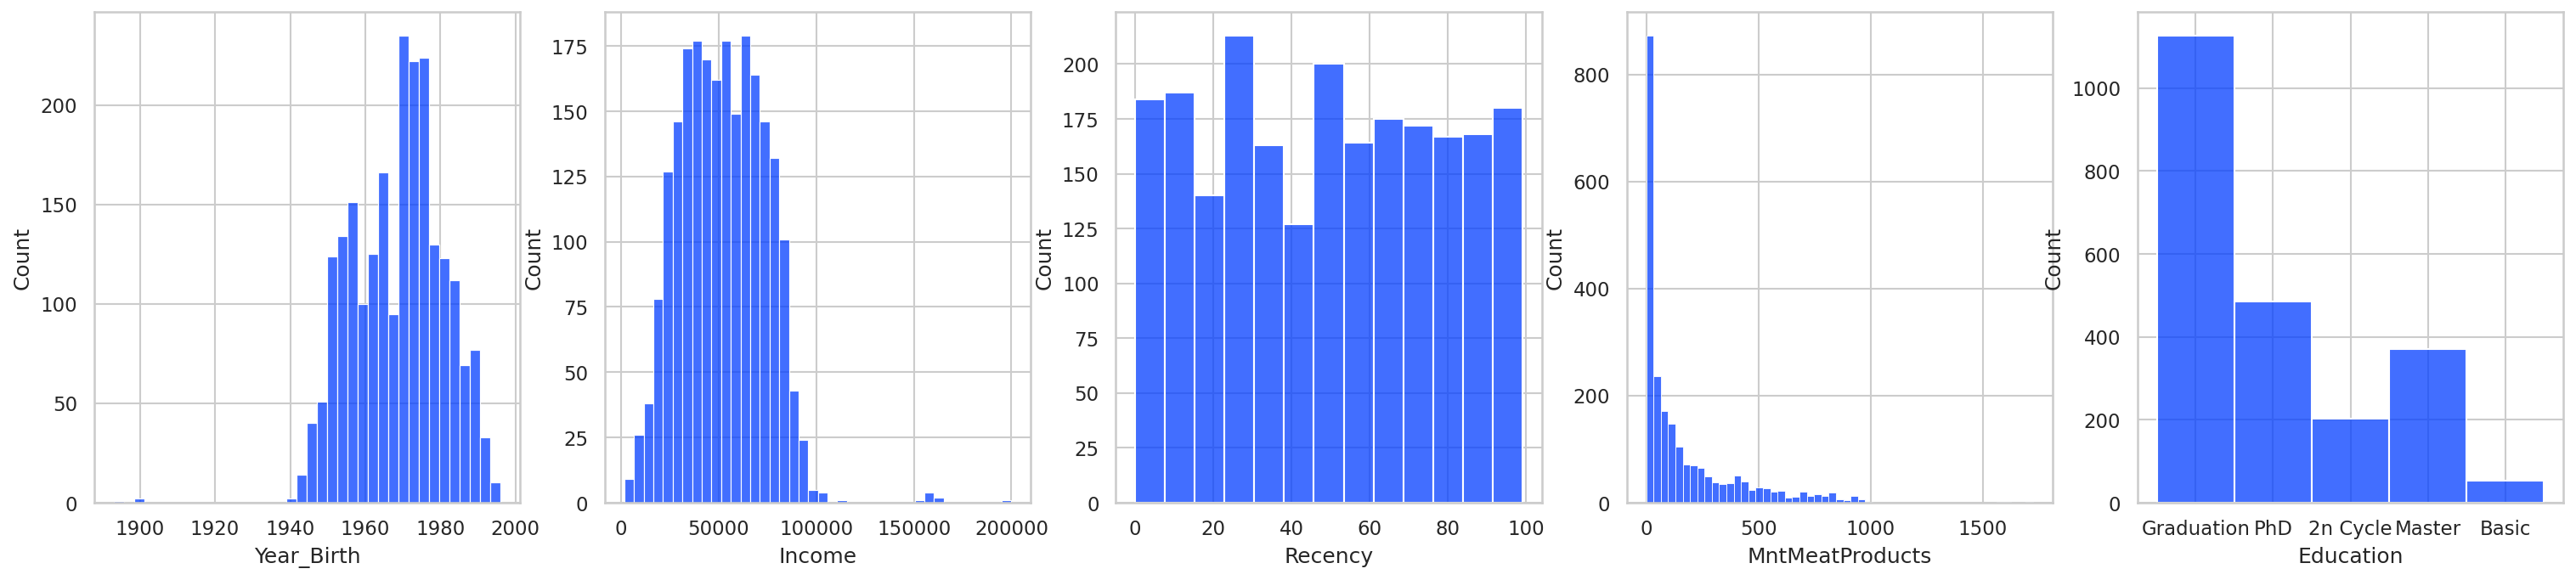

In [120]:
sns.set(style='whitegrid', palette='bright')
fig, (ax1,ax2,ax3,ax4, ax5) = plt.subplots(1,5, figsize=(25,5), dpi=150)


sns.histplot(df['Year_Birth'], ax = ax1)
sns.histplot(df['Income'], ax = ax2)
sns.histplot(df['Recency'], ax = ax3)
sns.histplot(df['MntMeatProducts'], ax = ax4)
sns.histplot(df['Education'], ax = ax5)



<Axes: xlabel='NumStorePurchases', ylabel='Count'>

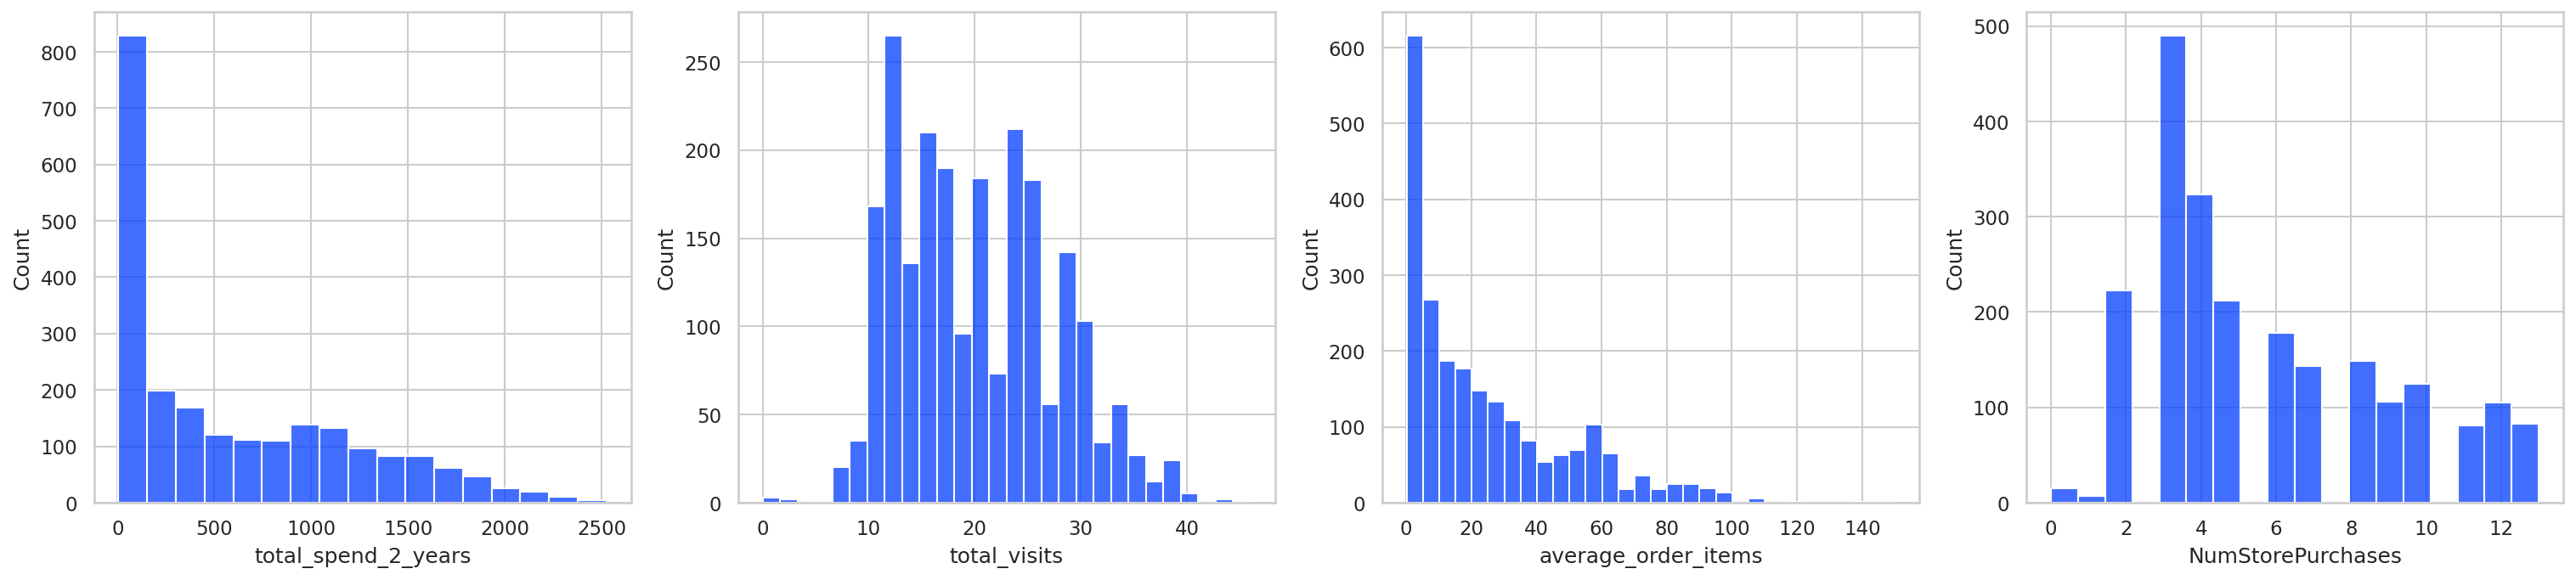

In [121]:
sns.set(style='whitegrid', palette='bright')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(25,5), dpi=150)

sns.histplot(df['total_spend_2_years'], ax = ax1)
sns.histplot(df['total_visits'], ax = ax2)
sns.histplot(df['average_order_items'], ax = ax3)
sns.histplot(df['NumStorePurchases'], ax = ax4)

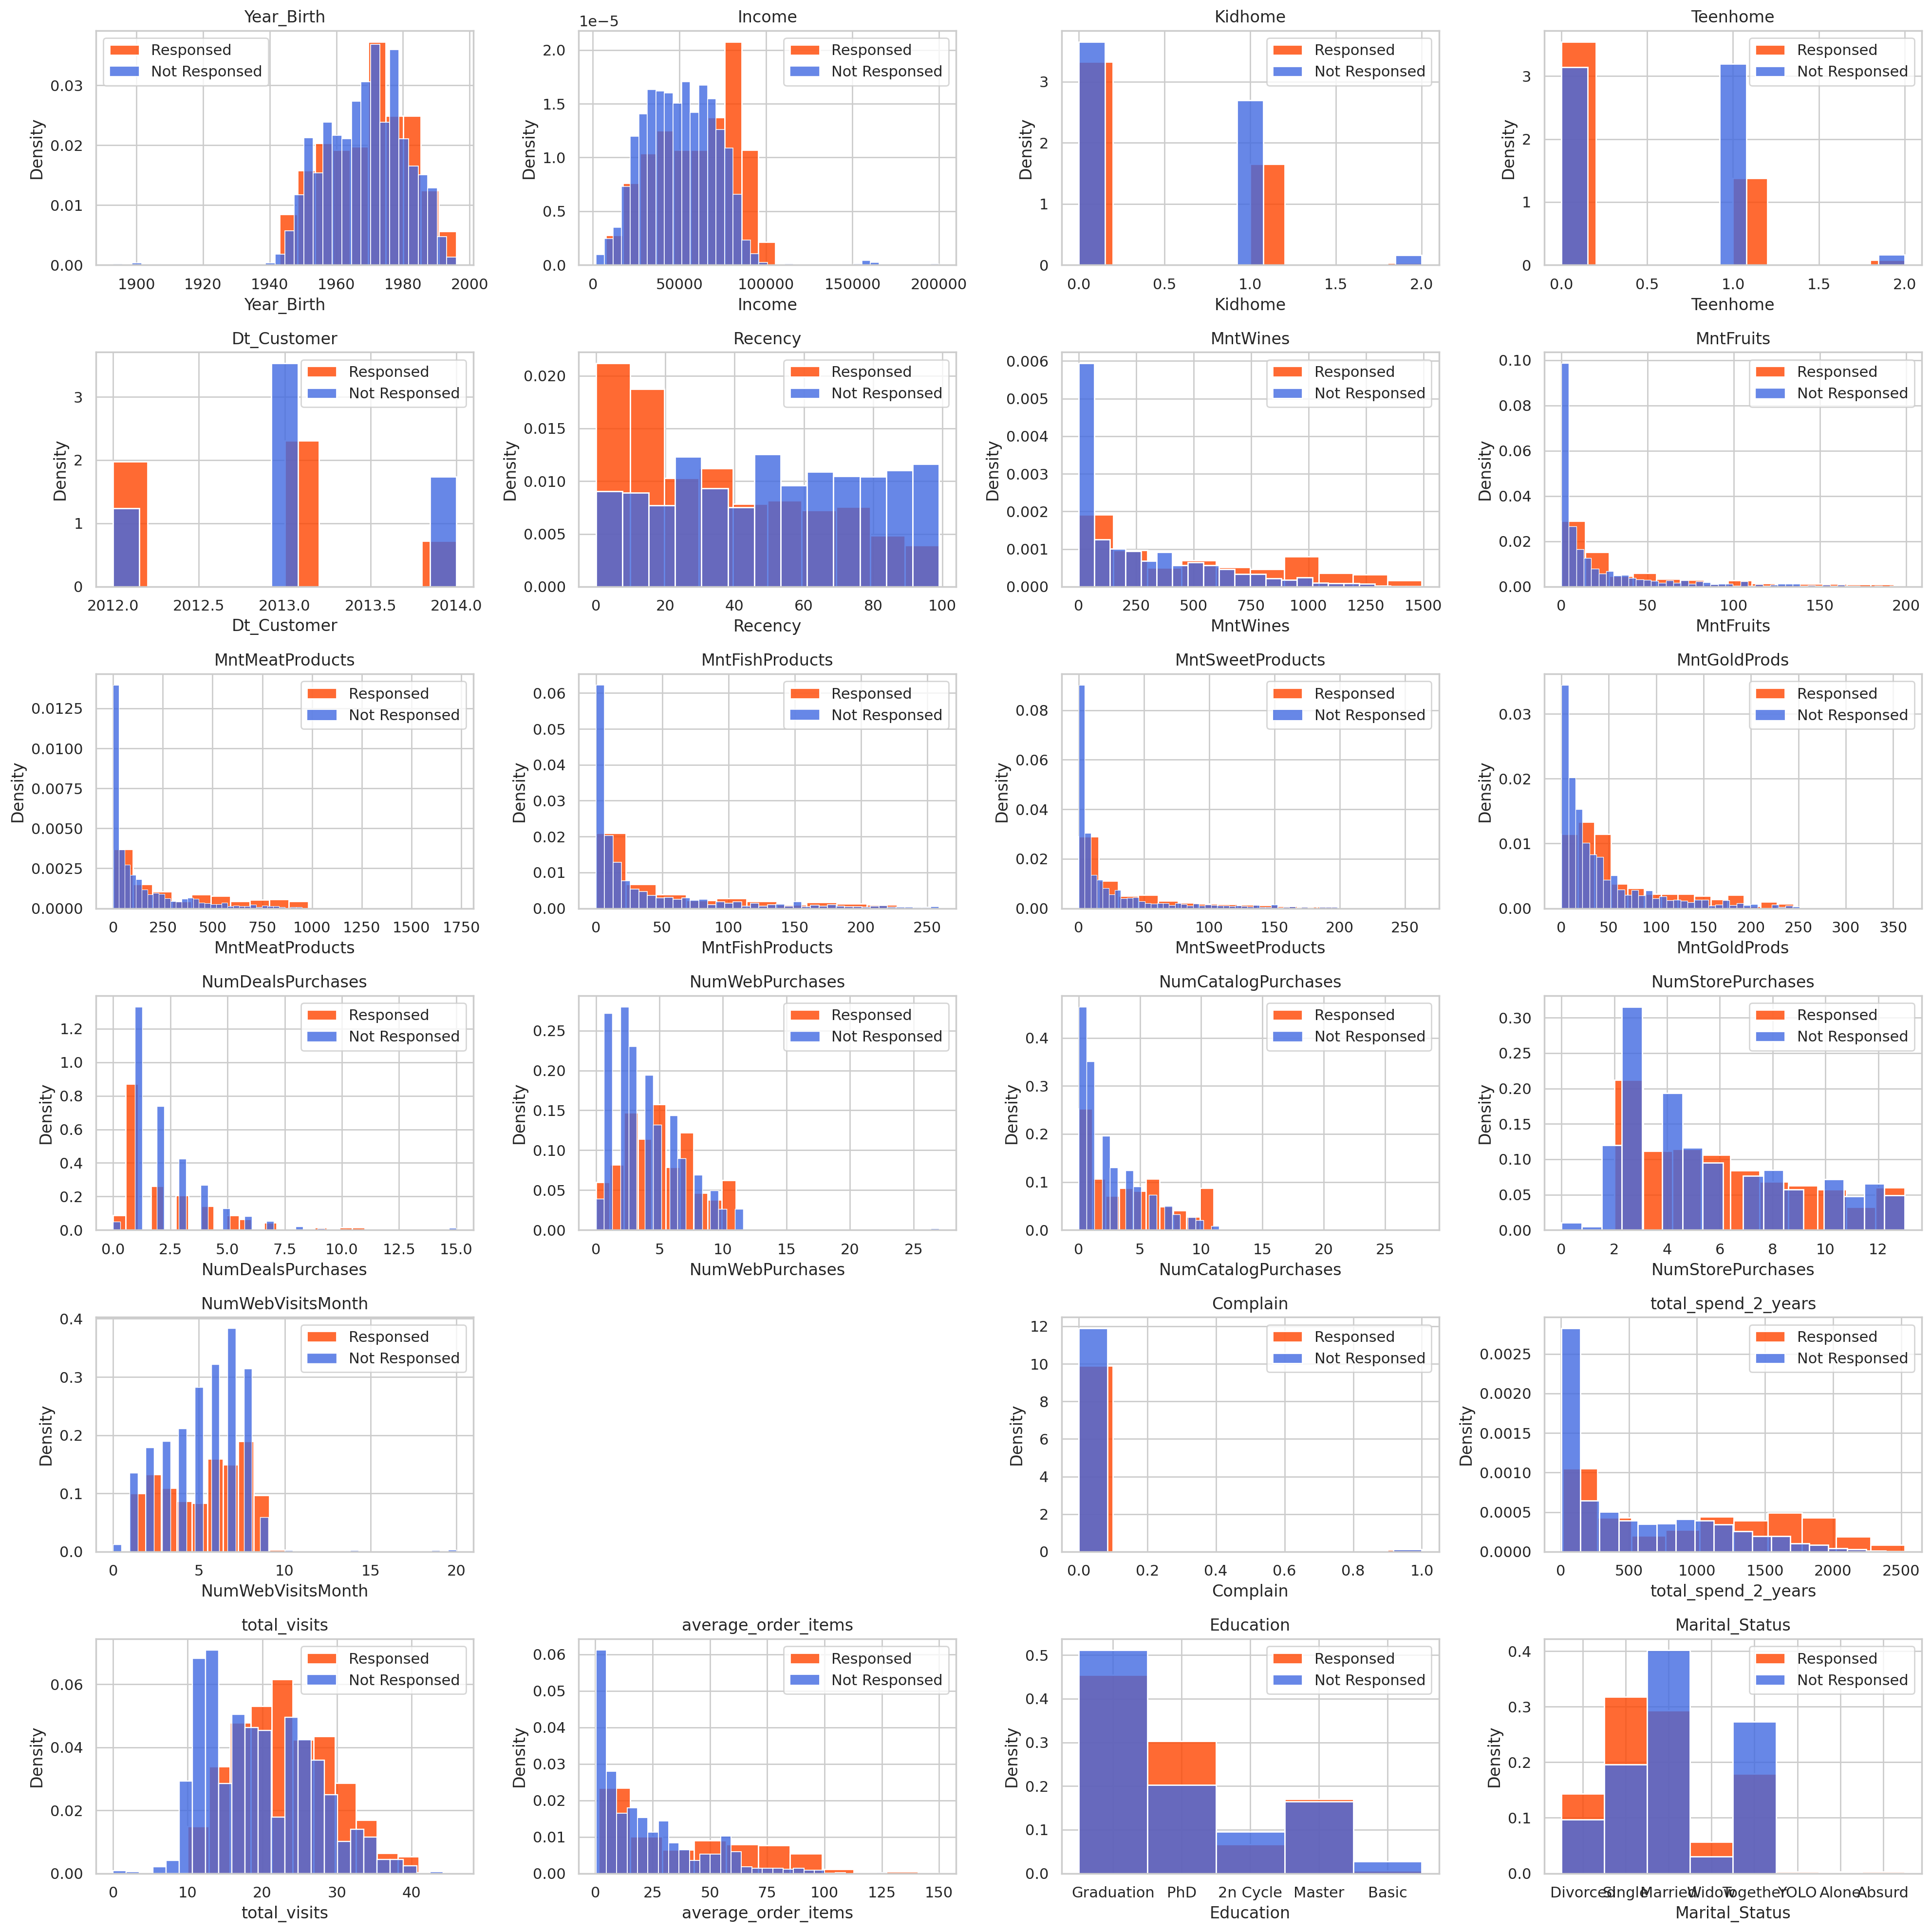

In [122]:
df_response = df[df['Response']==1]
df_nonresponse = df[df['Response']==0]
plt.figure(figsize=(20, 20),dpi=200)

for i, col in enumerate(num_features+cat_features, 1):
    if col!='Response':
      plt.subplot(6, 4, i)
      sns.histplot(df_response[col], color="orangered", label="Responsed", stat="density",alpha=0.8)
      sns.histplot(df_nonresponse[col], color="royalblue", label="Not Responsed", stat="density" ,alpha=0.8)


      plt.legend()
      plt.title(f'{col}')

plt.tight_layout()
plt.show()


<Axes: >

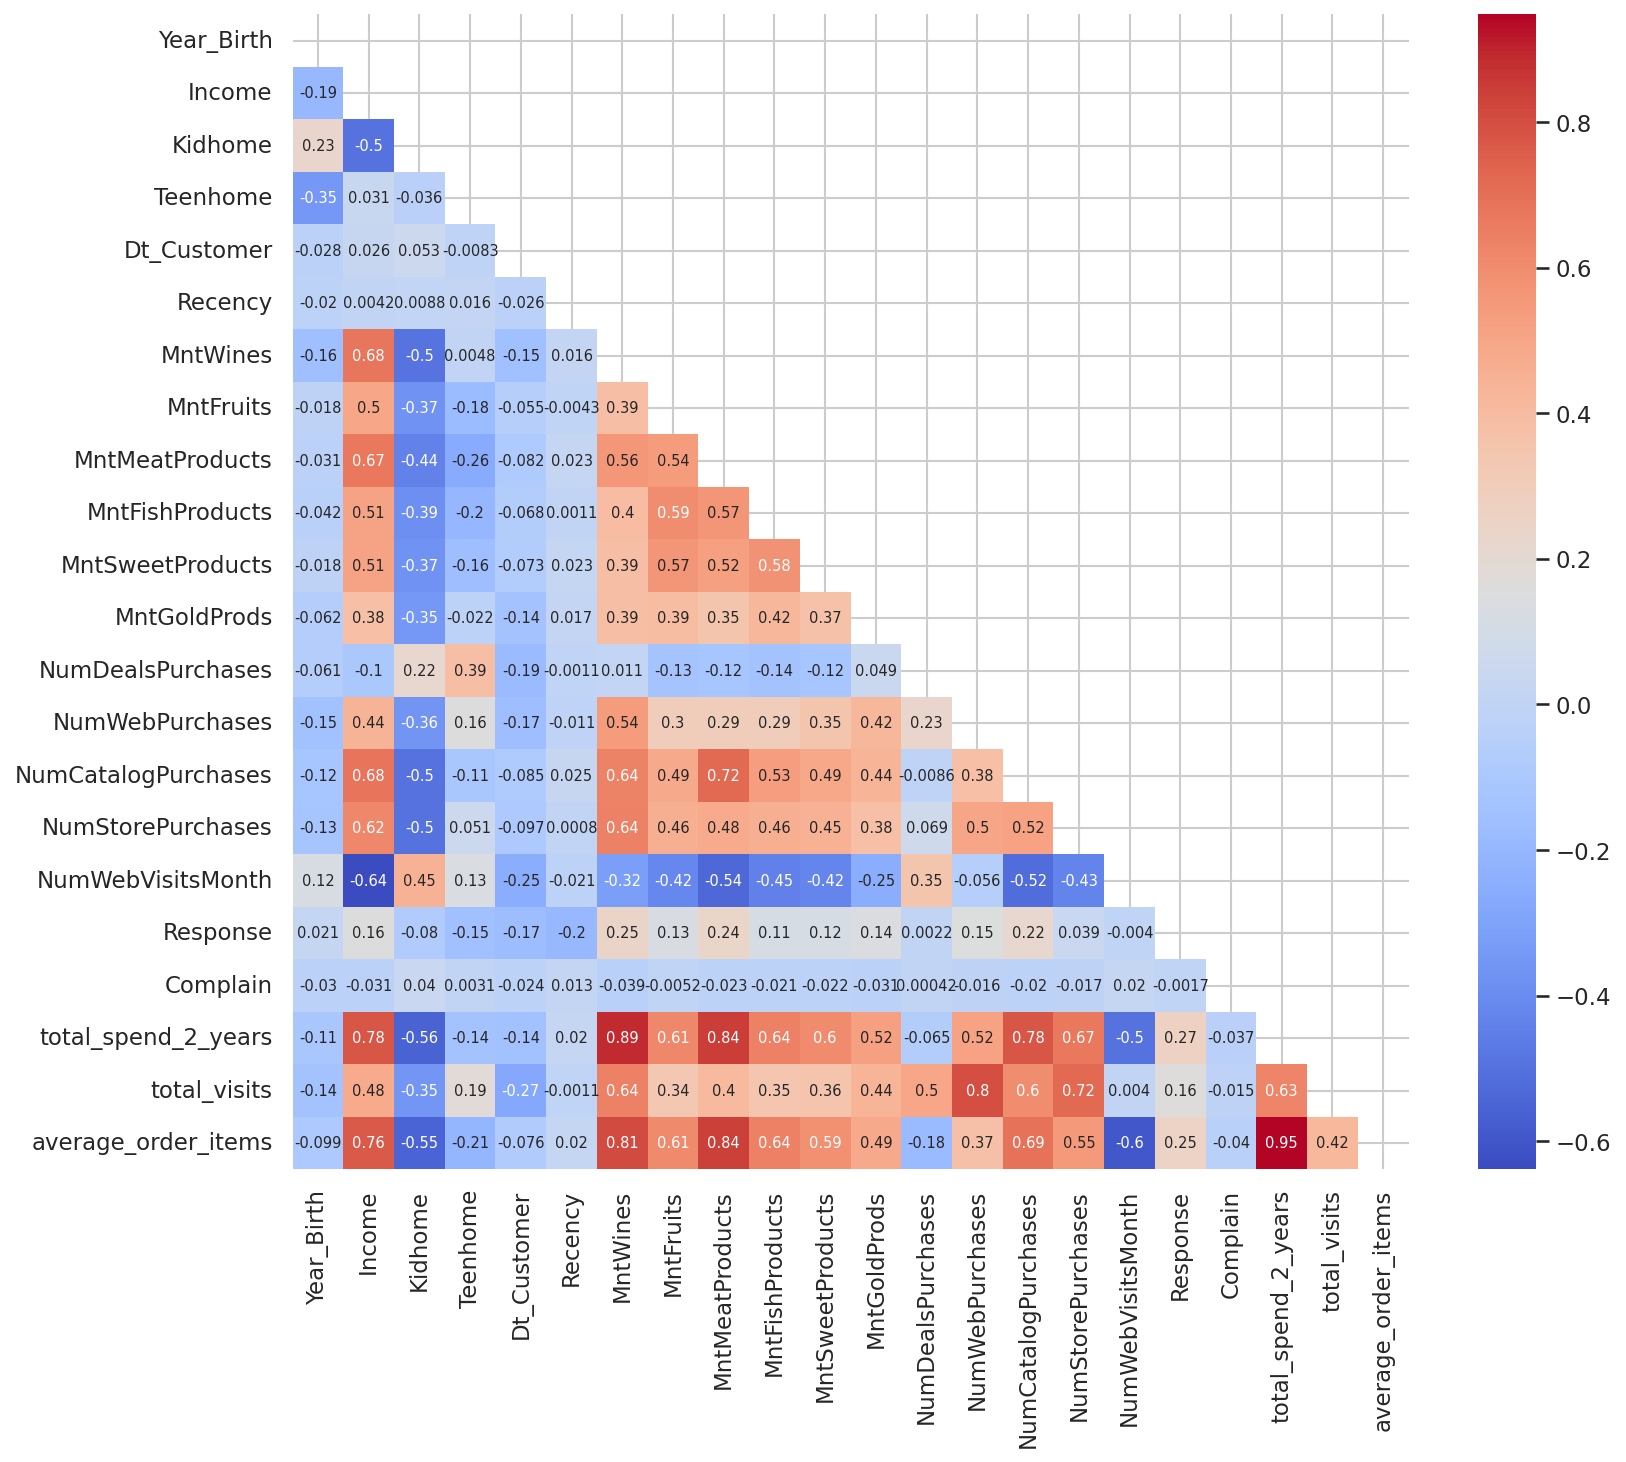

In [123]:
plt.figure(figsize=(12,10),dpi=150)
cor = df[num_features].corr()
sns.heatmap(cor, annot=True, annot_kws={"size":7}, mask = np.triu(cor), cmap='coolwarm')

## **XGBoost Model**

In [124]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = df[df.columns.difference(['Id', 'Response'])]
y = df['Response']

X = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train.shape, y_train.value_counts()

((1792, 32),
 Response
 0    1530
 1     262
 Name: count, dtype: int64)

In [125]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_train.shape, y_train.value_counts()

((3060, 32),
 Response
 0    1530
 1    1530
 Name: count, dtype: int64)

In [126]:
model = XGBClassifier(colsample_bytree=0.6).fit(X_train, y_train)
from sklearn.metrics import classification_report

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_test_pred)

print("Classification Report for Training Data:\n", report_train)
print("Classification Report for Testing Data:\n", report_test)

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1530
           1       1.00      0.99      1.00      1530

    accuracy                           1.00      3060
   macro avg       1.00      1.00      1.00      3060
weighted avg       1.00      1.00      1.00      3060

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       376
           1       0.57      0.54      0.55        72

    accuracy                           0.86       448
   macro avg       0.74      0.73      0.73       448
weighted avg       0.86      0.86      0.86       448



 96%|=================== | 2948/3060 [00:21<00:00]       

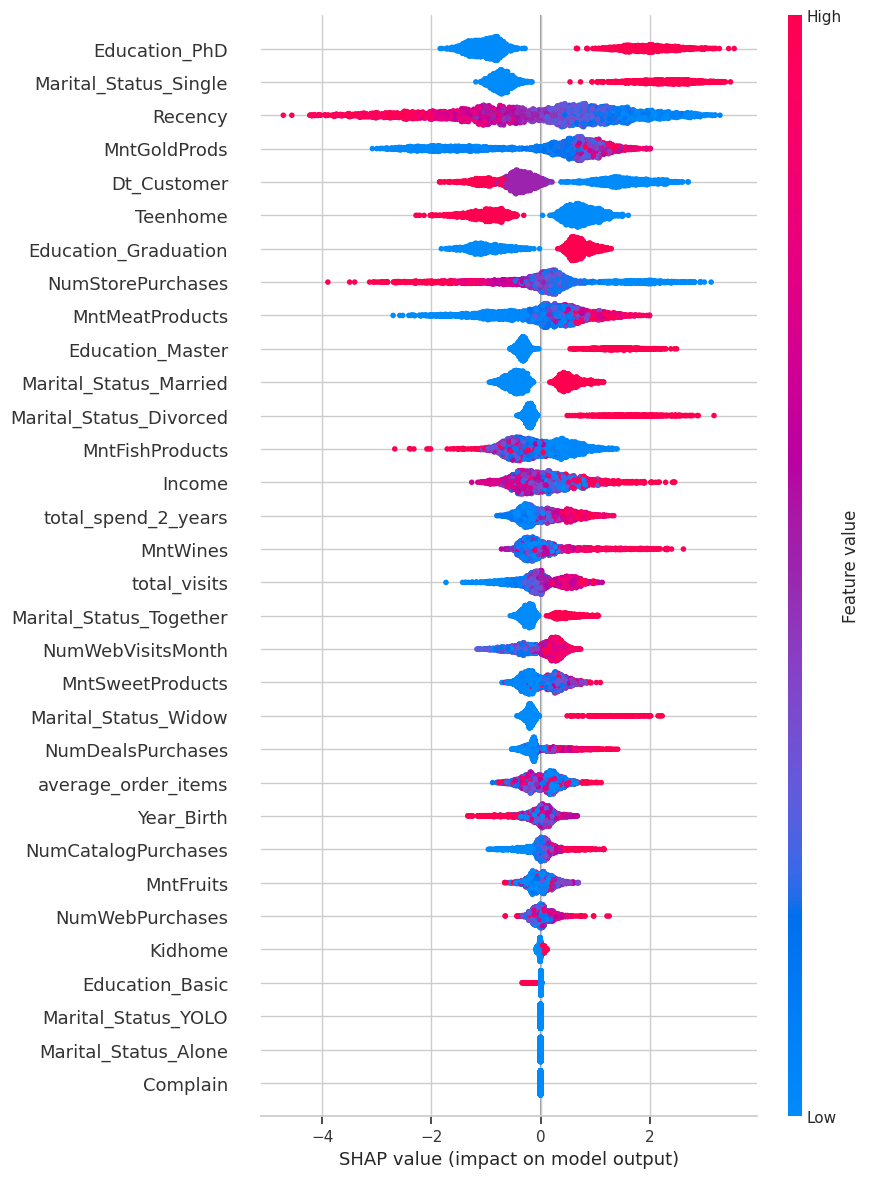

In [127]:
import shap

explainer = shap.Explainer(model, X_train.astype(float))
shap_values = explainer(X_train.astype(float))
shap.plots.beeswarm(shap_values, max_display=X_train.shape[1])

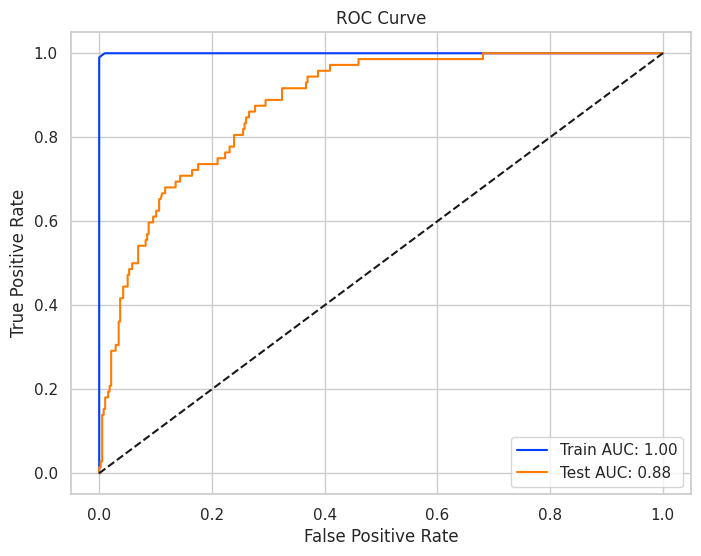

In [129]:
from sklearn.metrics import roc_curve, auc
y_train_pred_prob = model.predict_proba(X_train)[:, 1]
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC: {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC: {auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## **Grid Search AUC**

In [133]:
param_space = {
    'max_depth': np.arange(3, 10),  # Depths from 3 to 9, control overfitting
    'n_estimators': np.arange(40,160,20),  # Number of boosting rounds, balance between speed and accuracy
    'learning_rate': np.linspace(0.08, 0.4, 20),  # Makes the model more robust by shrinking the weights on each step
    'subsample': np.linspace(0.5, .9, 6),  # Subsample ratio of the training instances, prevents overfitting
    'colsample_bytree': np.linspace(0.5, .9, 6),  # Subsample ratio of columns when constructing each tree, for diversity
    'min_child_weight': [1, 2, 3, 4, 5],  # Minimum sum of instance weight (hessian) needed in a child, controls overfitting
    'gamma': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],  # Minimum loss reduction required to make a further partition on a leaf node, controls overfitting
    'reg_alpha': [0.1, 0.3, 0.5, 1],  # L1 regularization term on weights, increases model sparsity
    'reg_lambda': [1, 0.5, 0.1, 0.01],  # L2 regularization term on weights, combats overfitting
}


In [134]:
import random

n_combinations = 100
# Function to randomly sample a combination of hyperparameters
def random_combination(param_space, n_combinations):
    combinations = []
    for _ in range(n_combinations):
        params = {key: random.choice(value) for key, value in param_space.items()}
        combinations.append(params)
    return combinations

random_combos = random_combination(param_space, n_combinations)


In [135]:
from sklearn.metrics import recall_score, roc_auc_score, precision_score
from tqdm.auto import tqdm

best_auc = float("-inf")
best_params = None

for params in tqdm(random_combos, desc="Random searching..."):
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)

    # For AUC, we typically need probability scores of the positive class instead of the binary predictions.
    # Thus, we use predict_proba and take the second column (index 1) which corresponds to the probability of the positive class.
    proba_predictions = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, proba_predictions)
    print(auc, params)

    if auc > best_auc:
        best_auc = auc
        best_params = params

print("Best AUC:", best_auc)
print("Best parameters:", best_params)


Random searching...:   0%|          | 0/100 [00:00<?, ?it/s]

0.8426972517730497 {'max_depth': 5, 'n_estimators': 60, 'learning_rate': 0.3831578947368421, 'subsample': 0.9, 'colsample_bytree': 0.58, 'min_child_weight': 5, 'gamma': 0.05, 'reg_alpha': 0.5, 'reg_lambda': 0.5}
0.8540004432624114 {'max_depth': 5, 'n_estimators': 40, 'learning_rate': 0.11368421052631579, 'subsample': 0.5, 'colsample_bytree': 0.58, 'min_child_weight': 3, 'gamma': 0.5, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
0.8492723108747045 {'max_depth': 5, 'n_estimators': 60, 'learning_rate': 0.24842105263157893, 'subsample': 0.9, 'colsample_bytree': 0.5, 'min_child_weight': 1, 'gamma': 0.05, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
0.8706597222222222 {'max_depth': 9, 'n_estimators': 100, 'learning_rate': 0.16421052631578947, 'subsample': 0.74, 'colsample_bytree': 0.9, 'min_child_weight': 5, 'gamma': 0.2, 'reg_alpha': 0.1, 'reg_lambda': 0.5}
0.8725435874704491 {'max_depth': 8, 'n_estimators': 100, 'learning_rate': 0.08, 'subsample': 0.74, 'colsample_bytree': 0.74, 'min_child_weight': 1, '

## **Grid Search Recall**

In [ ]:
from sklearn.metrics import recall_score, roc_auc_score, precision_score
from tqdm.auto import tqdm
from xgboost import XGBClassifier

best_recall = float("-inf")
best_params = None

for params in tqdm(random_combos, desc="Random searching..."):
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)

    # For recall, we use the actual predictions.
    predictions = model.predict(X_test)

    recall = recall_score(y_test, predictions)
    print(recall, params)

    if recall > best_recall:
        best_recall = recall
        best_params = params

print("Best Recall:", best_recall)
print("Best parameters:", best_params)


In [136]:
# Best_parameters = {'max_depth': 4, 'n_estimators': 130, 'learning_rate': 0.25655172413793104, 'subsample': 0.7, 'colsample_bytree': 0.7, 'min_child_weight': 2, 'gamma': 0.4, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
model = XGBClassifier(**best_params).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_test_pred)

print("Classification Report for Training Data:\n", report_train)
print("Classification Report for Testing Data:\n", report_test)

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1530
           1       0.99      0.99      0.99      1530

    accuracy                           0.99      3060
   macro avg       0.99      0.99      0.99      3060
weighted avg       0.99      0.99      0.99      3060

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       376
           1       0.56      0.56      0.56        72

    accuracy                           0.86       448
   macro avg       0.74      0.74      0.74       448
weighted avg       0.86      0.86      0.86       448



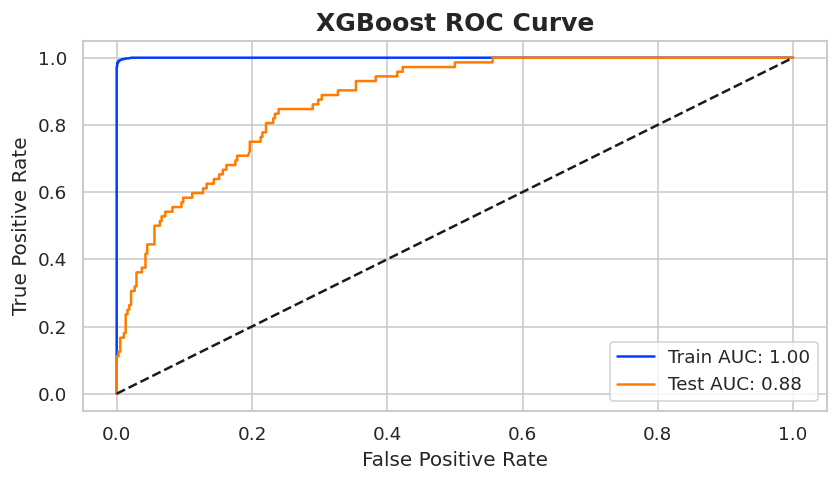

In [328]:
from sklearn.metrics import roc_curve, auc
y_train_pred_prob = model.predict_proba(X_train)[:, 1]
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 4), dpi=120)
plt.plot(fpr_train, tpr_train, label=f'Train AUC: {auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC: {auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve', fontweight='bold', fontsize=15)
plt.legend()
plt.show()

In [156]:
df_rfm = df[['Recency', 'total_visits', 'total_spend_2_years', 'Income']]
df_rfm = df_rfm.rename(columns={'Recency':'R', 'total_visits':'F', 'total_spend_2_years':'M', 'Income':'I'})
df_rfm

,R,F,M,I
0,0,16,1190,84835.0
1,0,23,577,57091.0
2,0,13,251,67267.0
3,0,11,11,32474.0
4,0,15,91,21474.0
...,...,...,...,...
2235,99,24,689,66476.0
2236,99,13,55,31056.0
2237,99,22,309,46310.0
2238,99,23,1383,65819.0


In [ ]:
from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df_rfm.copy()
sc = StandardScaler()

# Fit the preprocessing pipeline on the data
X_preprocessed = sc.fit_transform(X)

# Use the elbow method to determine the optimal number of clusters
inertia = []
silhouette_scores = []
range_values = range(2, 30)

for i in tqdm(range_values, "kmeans..."):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(X_preprocessed)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_preprocessed, kmeans.labels_))


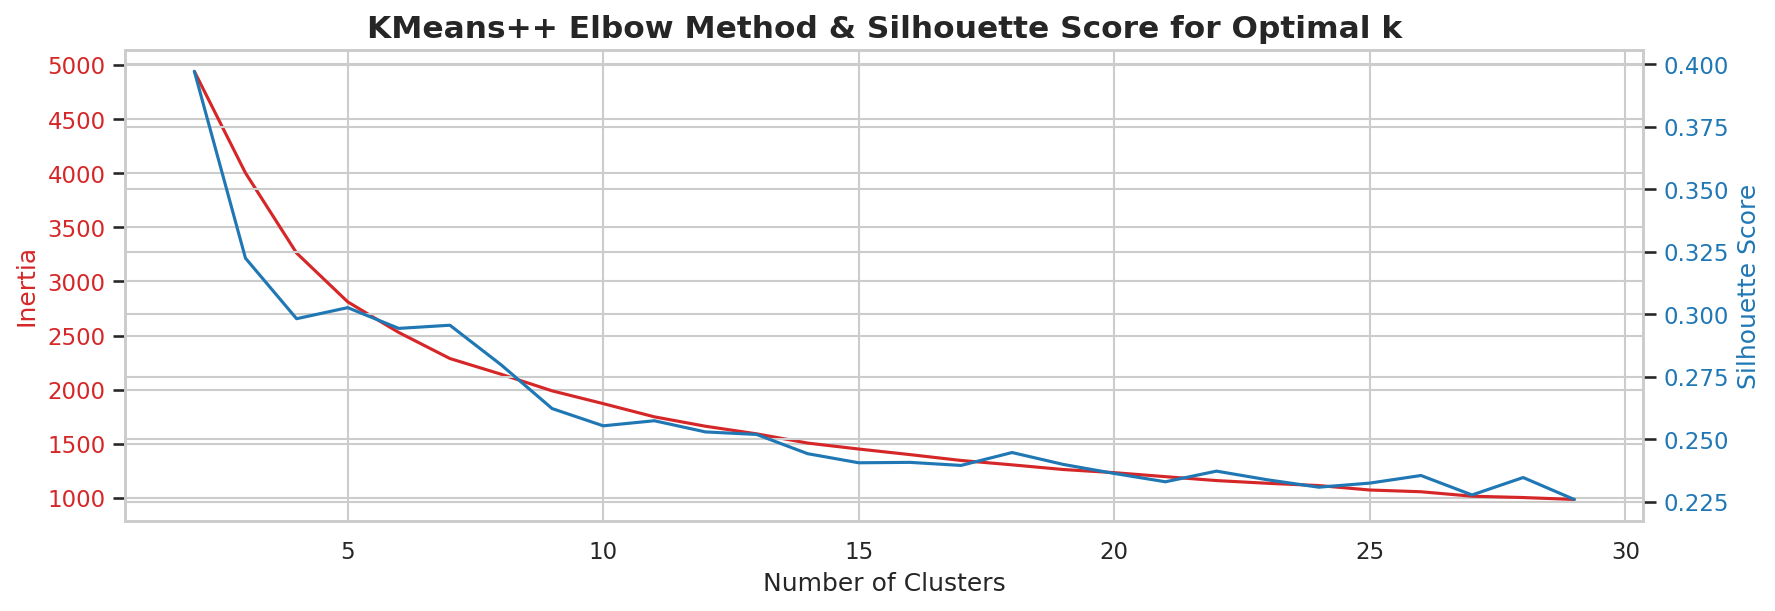

In [323]:
# Plotting the Elbow Method graph
fig, ax1 = plt.subplots(figsize=(12,4),dpi=150)

color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(range_values, inertia, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range_values, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('KMeans++ Elbow Method & Silhouette Score for Optimal k', fontweight='bold', fontsize=15)
plt.show()


In [233]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42).fit(X_preprocessed)
df_cluster = df_rfm.copy()
df_cluster['cluster'] = np.array(kmeans.labels_)
df_cluster

,R,F,M,I,cluster
0,0,16,1190,84835.0,4
1,0,23,577,57091.0,6
2,0,13,251,67267.0,6
3,0,11,11,32474.0,0
4,0,15,91,21474.0,0
...,...,...,...,...,...
2235,99,24,689,66476.0,5
2236,99,13,55,31056.0,2
2237,99,22,309,46310.0,5
2238,99,23,1383,65819.0,3


Cluster number ordered by conversion rate asc [2, 7, 9, 5, 1, 6, 0, 8, 3, 4]


Response,0,1,conversion_rate
cluster,,,
2,321,8,0.024316
7,290,20,0.064516
9,133,10,0.069930
5,186,14,0.070000
1,173,26,0.130653
6,184,35,0.159817
0,252,52,0.171053
8,145,41,0.220430
3,118,46,0.280488


<Figure size 960x720 with 0 Axes>

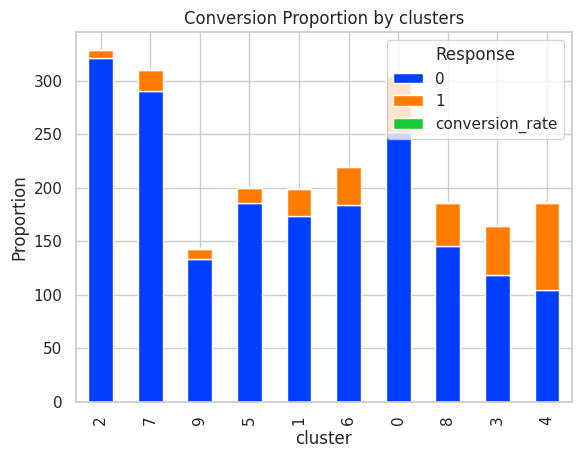

In [267]:
crosstab = pd.crosstab(df_cluster['cluster'], df['Response'])
crosstab['conversion_rate'] = crosstab[1]/(crosstab[1]+crosstab[0])
crosstab = crosstab.sort_values('conversion_rate')
conversion_order = list(crosstab.index)
print("Cluster number ordered by conversion rate asc", conversion_order)
display(crosstab)
plt.figure(dpi=150)
crosstab.plot(kind='bar', stacked=True)
plt.title('Conversion Proportion by clusters')
plt.ylabel('Proportion')
plt.show()

In [306]:
df_segment = df_cluster.groupby(['cluster']).mean()
df_segment
df_segment['I']/=1000
df_segment['F']*=2
df_segment['M']/=20
df_segment = df_segment.loc[conversion_order]
df_segment['conversion_rate'] = crosstab['conversion_rate']*200
df_segment

,R,F,M,I,conversion_rate
cluster,,,,,
2,82.775076,27.702128,4.436322,35.107156,4.863222
7,48.319355,27.264516,3.674194,32.332209,12.903226
9,69.580420,36.251748,49.475524,75.364816,13.986014
5,72.240000,48.100000,22.843000,49.373254,14.000000
1,68.467337,62.170854,51.046734,62.643514,26.130653
6,21.803653,44.611872,21.807991,52.440471,31.963470
0,15.378289,26.993421,3.817270,33.200480,34.210526
8,21.494624,61.118280,50.180108,66.142104,44.086022
3,75.371951,49.256098,85.105793,80.032668,56.097561


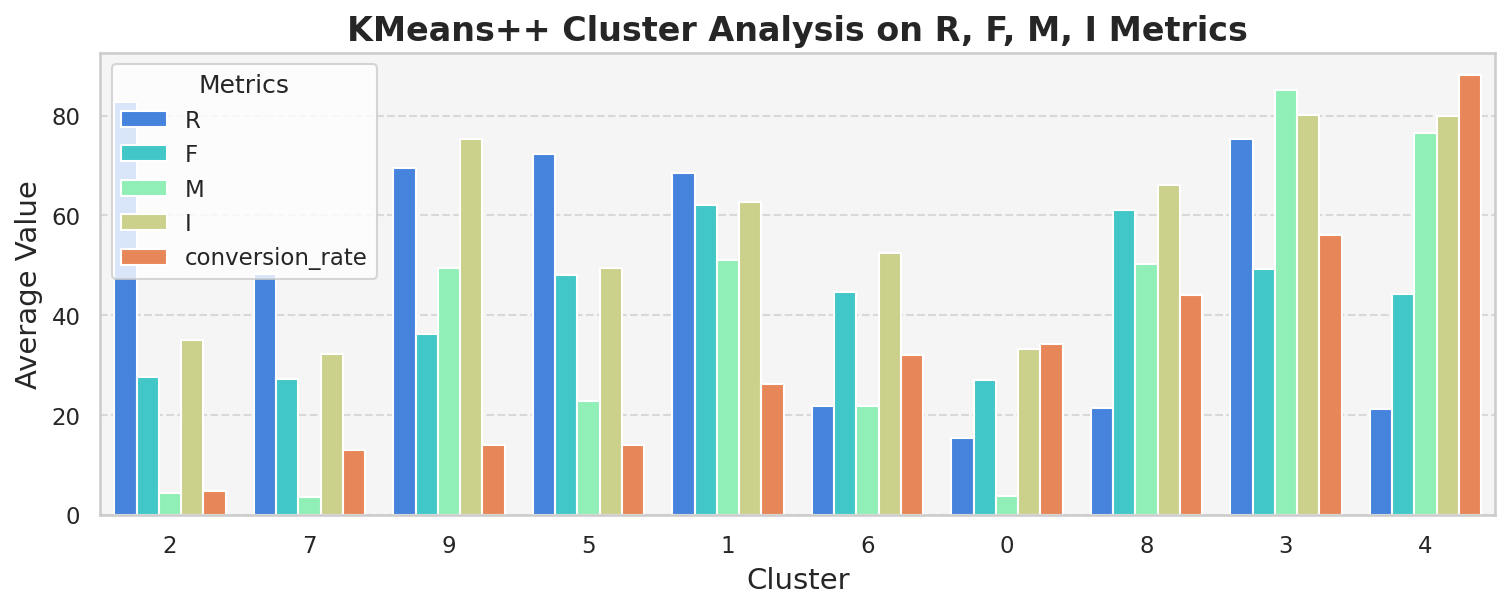

In [324]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=150)
sns.barplot(data=df_segment.reset_index().melt(id_vars='cluster'), x='cluster', y='value', hue='variable', palette='rainbow', order=conversion_order)

# Customize the plot
ax.set_title('KMeans++ Cluster Analysis on R, F, M, I Metrics', fontsize=16, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=14)
ax.set_ylabel('Average Value', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('whitesmoke')
plt.xticks(rotation=0)
plt.legend(title='Metrics')

plt.show()

In [271]:
crosstab

Response,0,1,conversion_rate
cluster,,,
2,321,8,0.024316
7,290,20,0.064516
9,133,10,0.069930
5,186,14,0.070000
1,173,26,0.130653
6,184,35,0.159817
0,252,52,0.171053
8,145,41,0.220430
3,118,46,0.280488


array([82.77507599, 27.70212766,  4.43632219, 35.10715588,  4.86322188,
       82.77507599])

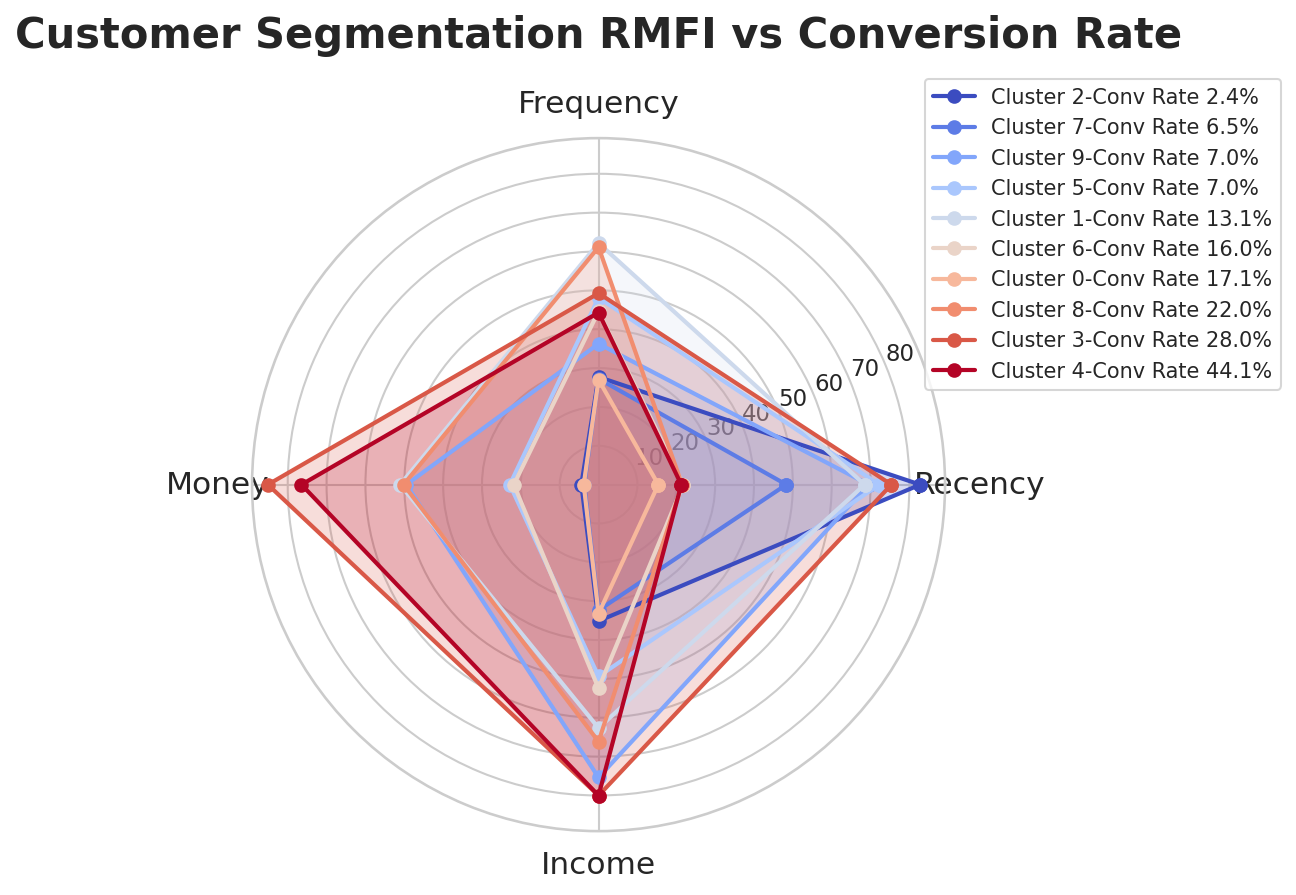

In [325]:
import matplotlib.cm as cm

num_colors = n_clusters

number = list(range(n_clusters))
colors = cm.coolwarm(np.linspace(0, 1, num_colors) )


fig = plt.figure(figsize=(8, 6), dpi=150)
ax = fig.add_subplot(111, polar=True)
features = ["Recency", "Frequency", "Money", "Income"]
N = len(features)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

ax.set_thetagrids(np.degrees(angles[:-1]), features, fontsize=15)

# Plotting with the colors generated from 'coolwarm'
for i, v in enumerate(df_segment.values):
    row = v[:-1]
    values = [*row, row[0]]  # Close the radar loop

    cluster = crosstab.index[i]
    conv_rate = crosstab.loc[cluster]['conversion_rate'] *100
    # print(cluster, conv_rate)
    ax.plot(angles, values, 'o-', linewidth=2, label=f"Cluster {cluster}-Conv Rate {round(conv_rate,1)}%", color=colors[i])
    ax.fill(angles, values, alpha=0.2, color=colors[i])

plt.title('Customer Segmentation RMFI vs Conversion Rate', fontsize=20, pad=20, fontweight='bold')
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1), fontsize=10)

plt.show()
